In [448]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [ ]:
xl = pd.ExcelFile("TransElectricaData.xlsx")
df = xl.parse('Grafic SEN',index_col=0,inplace=True)

In [ ]:
df.index=pd.to_datetime(df.index)

In [656]:
dforig=dforig.sort_index(ascending=True)

In [451]:
df=df[~df.index.duplicated(keep='first')]

In [452]:
df=df.sort_index(ascending=True)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 568487 entries, 2007-01-12 00:08:00 to 2018-12-10 23:51:42
Data columns (total 11 columns):
Consum[MW]          568487 non-null object
Medie Consum[MW]    568487 non-null object
Productie[MW]       568487 non-null object
Carbune[MW]         568487 non-null object
Hidrocarburi[MW]    568487 non-null object
Ape[MW]             568487 non-null object
Nuclear[MW]         568487 non-null object
Eolian[MW]          568487 non-null object
Foto[MW]            568487 non-null object
Biomasa[MW]         568487 non-null object
Sold[MW]            568487 non-null object
dtypes: object(11)
memory usage: 52.0+ MB


In [454]:
df = df.apply(pd.to_numeric,errors='coerce').fillna(method='ffill')

In [127]:
 # for safety purposes to access original dataframe
dforig = df
#df = dforig

In [457]:
print(df.describe())

          Consum[MW]  Medie Consum[MW]  Productie[MW]    Carbune[MW]  \
count  568487.000000     568487.000000   568487.00000  568487.000000   
mean     6624.654055       5019.307240     7040.72779    2340.455671   
std      1007.842082       3015.037512     1157.76768     657.635581   
min        44.000000          0.000000        0.00000    -485.000000   
25%      5856.000000       4630.000000     6206.00000    1847.000000   
50%      6589.000000       6153.000000     6979.00000    2284.000000   
75%      7301.000000       7057.000000     7821.00000    2805.000000   
max     26209.000000     125647.000000    11336.00000    5702.000000   

       Hidrocarburi[MW]        Ape[MW]    Nuclear[MW]     Eolian[MW]  \
count     568487.000000  568487.000000  568487.000000  568487.000000   
mean        1003.410720    1869.873330    1316.884838     420.702475   
std          469.563448     731.323626     229.779603     570.051231   
min         -414.000000       0.000000       0.000000    -521.0

In [458]:
CV = df.std()/df.mean()
print(CV.sort_values(ascending=False))

Foto[MW]            2.452021
Eolian[MW]          1.354999
Biomasa[MW]         1.087341
Medie Consum[MW]    0.600688
Hidrocarburi[MW]    0.467967
Ape[MW]             0.391109
Carbune[MW]         0.280986
Nuclear[MW]         0.174487
Productie[MW]       0.164439
Consum[MW]          0.152135
Sold[MW]           -1.366439
dtype: float64


In [459]:
rsf = 'Q'
df2= df.resample(rsf).mean()
df2 = df2.dropna()
df2.head()

,Consum[MW],Medie Consum[MW],Productie[MW],Carbune[MW],Hidrocarburi[MW],Ape[MW],Nuclear[MW],Eolian[MW],Foto[MW],Biomasa[MW],Sold[MW]
Data,,,,,,,,,,,
2007-03-31,7206.242991,0.0,7438.955607,2762.399533,1480.792056,1766.460280,1429.296729,0.0,0.0,0.0,-232.735981
2007-06-30,7847.235012,0.0,8336.745803,3141.467626,1559.669065,2204.685851,1430.899281,0.0,0.0,0.0,-489.494005
2007-09-30,7357.453704,0.0,7765.083333,2834.682870,1489.180556,2009.300926,1431.893519,0.0,0.0,0.0,-407.608796
2007-12-31,7560.989839,0.0,8053.896281,3080.616181,1485.838574,2103.609279,1383.921396,0.0,0.0,0.0,-492.910084
2008-03-31,7138.969237,0.0,7809.721266,3270.428653,1221.520617,1968.941640,1348.804627,0.0,0.0,0.0,-670.743750


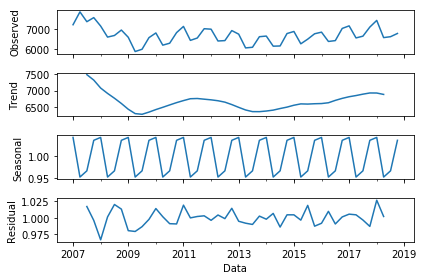

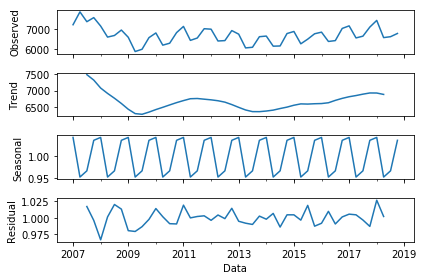

In [460]:
res = sm.tsa.seasonal_decompose(df2["Consum[MW]"], freq=4,model='multiplicative')
res.plot()

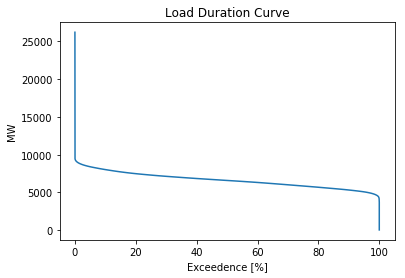

In [461]:
sort = np.sort(df['Consum[MW]'])[::-1]
exceedence = np.arange(1.,len(sort)+1) / len(sort)

plt.plot(exceedence*100, sort)
plt.xlabel("Exceedence [%]")
plt.ylabel("MW")
plt.title('Load Duration Curve')
plt.show()

Text(0.5,1,'Frequency of Consumption[MW]: Q')

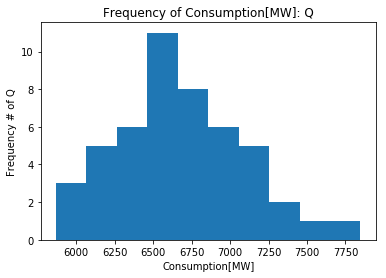

In [462]:
plt.hist(df2['Consum[MW]'])
plt.xlabel("Consumption[MW]")
plt.ylabel("Frequency # of " + str(rsf))
plt.title('Frequency of Consumption[MW]: '+str(rsf))

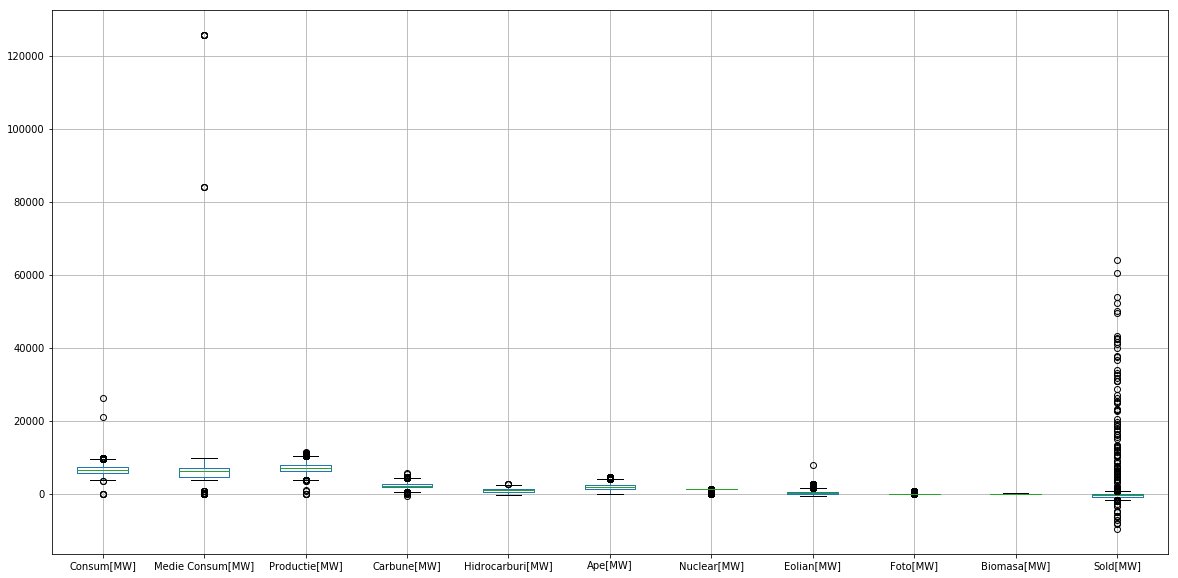

In [463]:
fig, ax = plt.subplots(figsize=(20, 10))
df.boxplot(ax=ax)

In [466]:
df3 = df

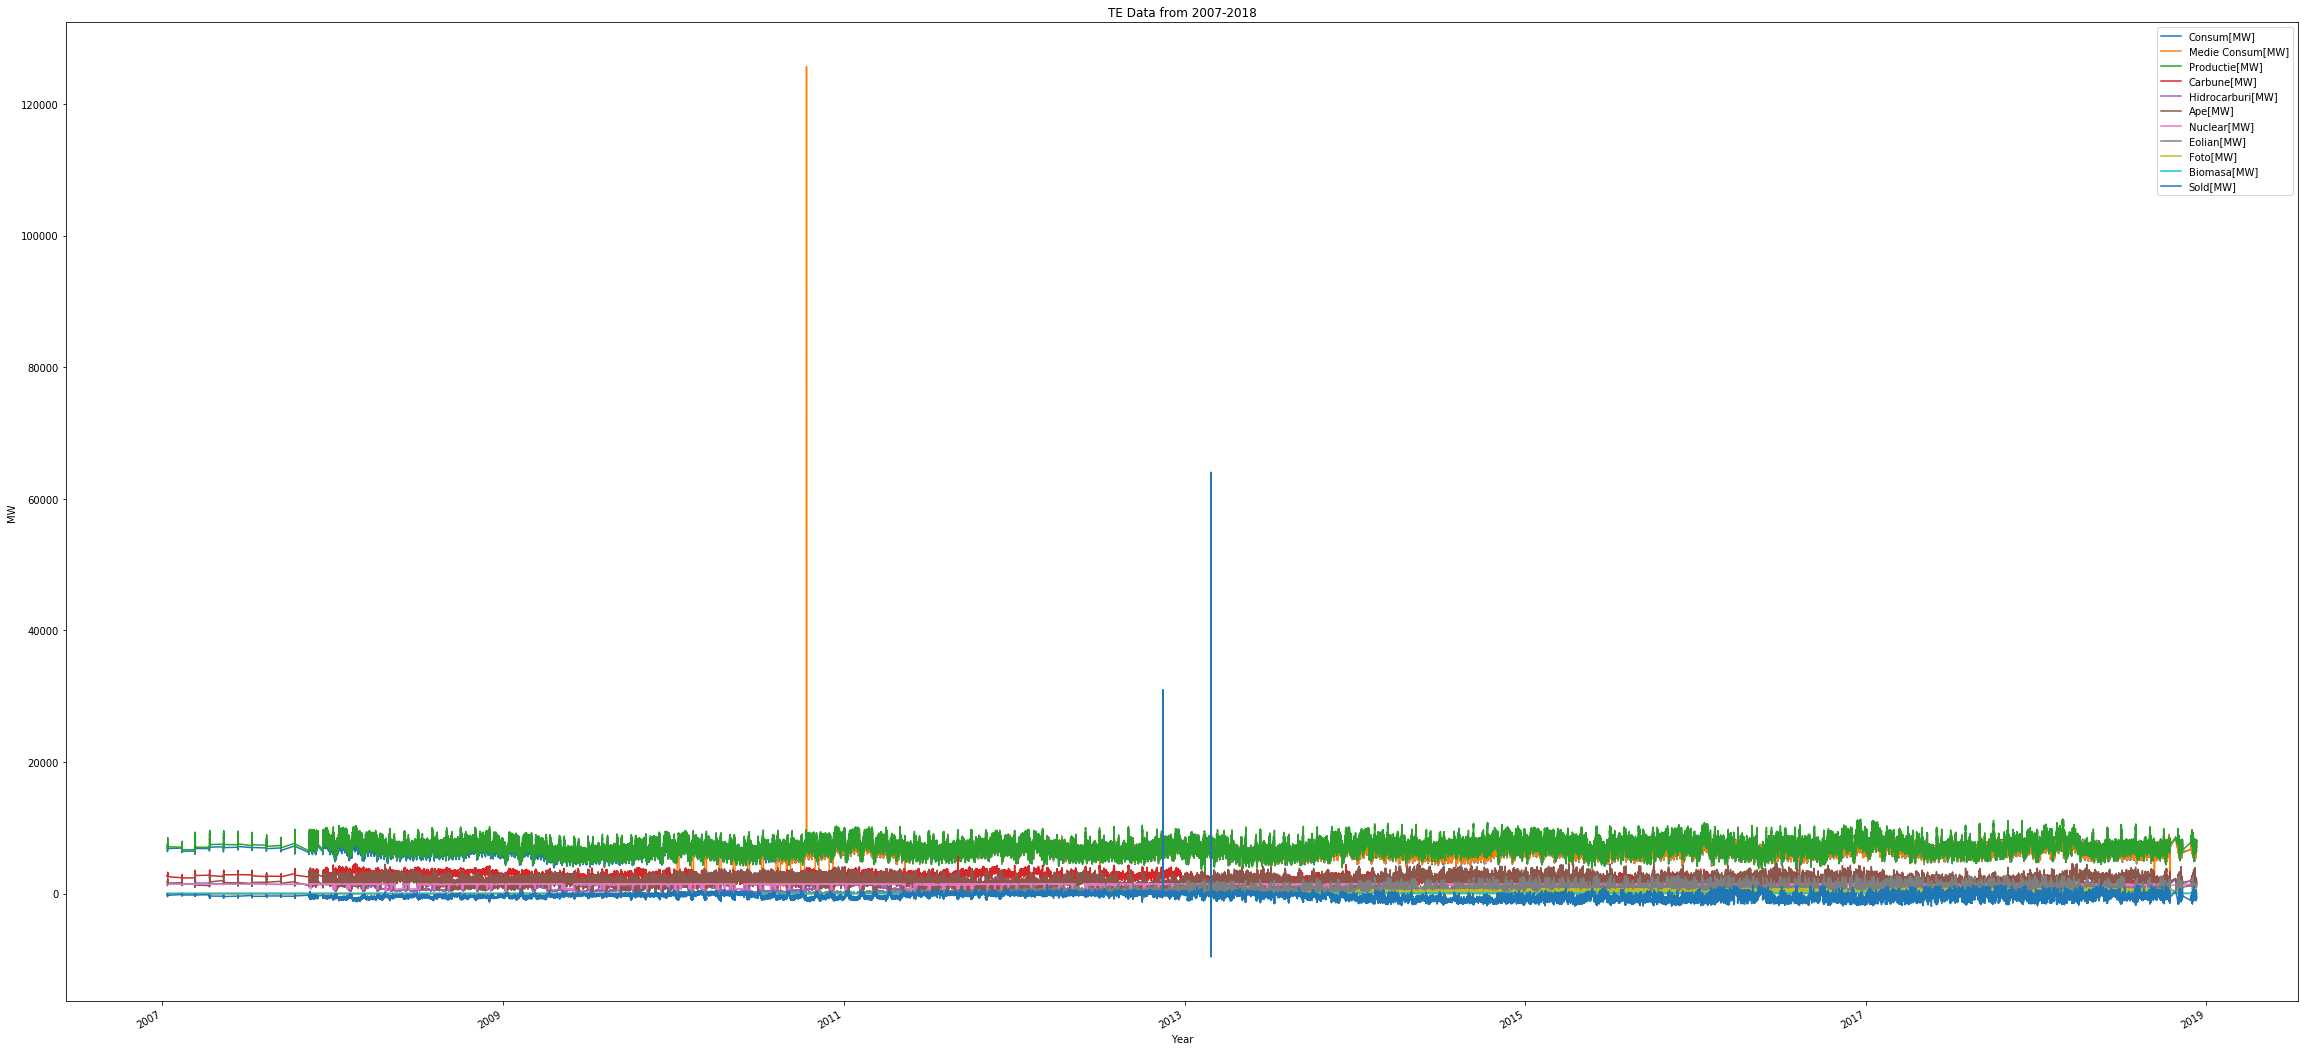

In [725]:
fig, ax = plt.subplots(figsize=(40, 20))
dforig.plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('MW')
plt.title('TE Data from 2007-2018')
plt.savefig('Energy Data from 2007-2018original')

In [855]:
def replace(group,degree):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > degree*std
    group[outliers] = np.NaN        # or "group[~outliers].mean()"
    return group

In [881]:
df.loc[:,'Medie Consum[MW]'].transform(replace,degree=6)
print(df.loc[:,'Medie Consum[MW]'].isna().sum())

108152


In [ ]:
print(df['Medie Consum[MW]'].min())
print(df[df.loc[:,'Medie Consum[MW]'].isna()])

In [869]:
df['Medie Consum[MW]']=df['Medie Consum[MW]'].interpolate()

In [484]:
df.loc[:,'Consum[MW]'].transform(replace,10)
print(df.loc[:,'Consum[MW]'].isna().sum())

2


In [487]:
print(df['Consum[MW]'].max())
print(df[df.loc[:,'Consum[MW]'].isna()])

9865.0
Empty DataFrame
Columns: [Consum[MW], Medie Consum[MW], Productie[MW], Carbune[MW], Hidrocarburi[MW], Ape[MW], Nuclear[MW], Eolian[MW], Foto[MW], Biomasa[MW], Sold[MW]]
Index: []


In [486]:
df['Consum[MW]']=df['Consum[MW]'].interpolate()

In [553]:
df.loc[:,'Sold[MW]'].transform(replace,degree=3)
print(df.loc[:,'Sold[MW]'].isna().sum())

503


In [586]:
print(df[df.loc[:,'Sold[MW]'].isna()])
print(df['Sold[MW]'].max())

Empty DataFrame
Columns: [Consum[MW], Medie Consum[MW], Productie[MW], Carbune[MW], Hidrocarburi[MW], Ape[MW], Nuclear[MW], Eolian[MW], Foto[MW], Biomasa[MW], Sold[MW]]
Index: []
7261.333333333333


In [587]:
df['Sold[MW]'] = df.apply(
    lambda row: row['Consum[MW]']-row['Productie[MW]'] if np.isnan(row['Sold[MW]']) else row['Sold[MW]'],
    axis=1
)

In [585]:
df.loc[:,'Eolian[MW]'].transform(replace,degree=6)
print(df.loc[:,'Eolian[MW]'].isna().sum())

518


In [560]:
df['Eolian[MW]']=df['Eolian[MW]'].interpolate()

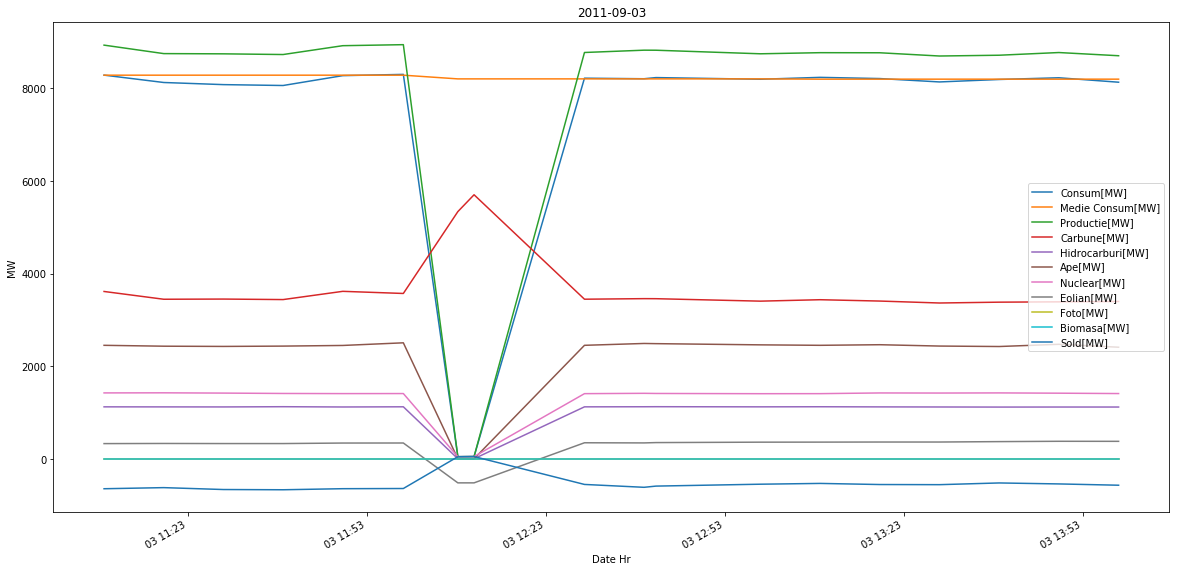

In [500]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
df.loc['2011-09-03 11':'2011-09-03 13'].plot(ax=ax1)
plt.xlabel('Date Hr')
plt.ylabel('MW')
plt.title('2011-09-03')
plt.savefig('2011-09-03updated')

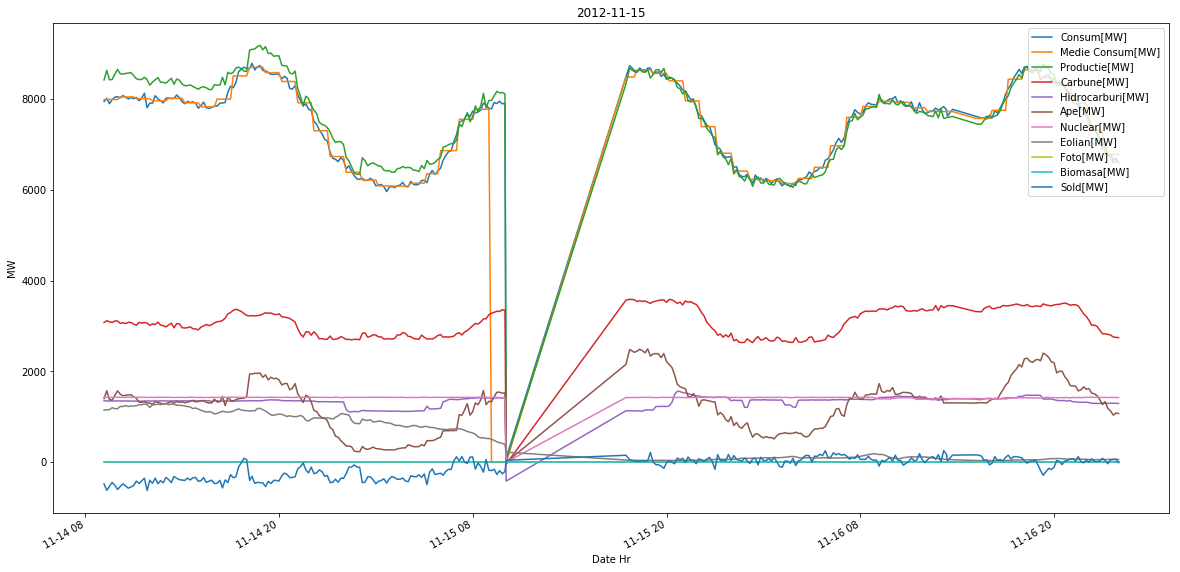

In [580]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
df.loc['2012-11-14 09':'2012-11-16'].plot(ax=ax1)
plt.xlabel('Date Hr')
plt.ylabel('MW')
plt.title('2012-11-15')
plt.legend(loc='upper right')
plt.savefig('2012-11-15updated')


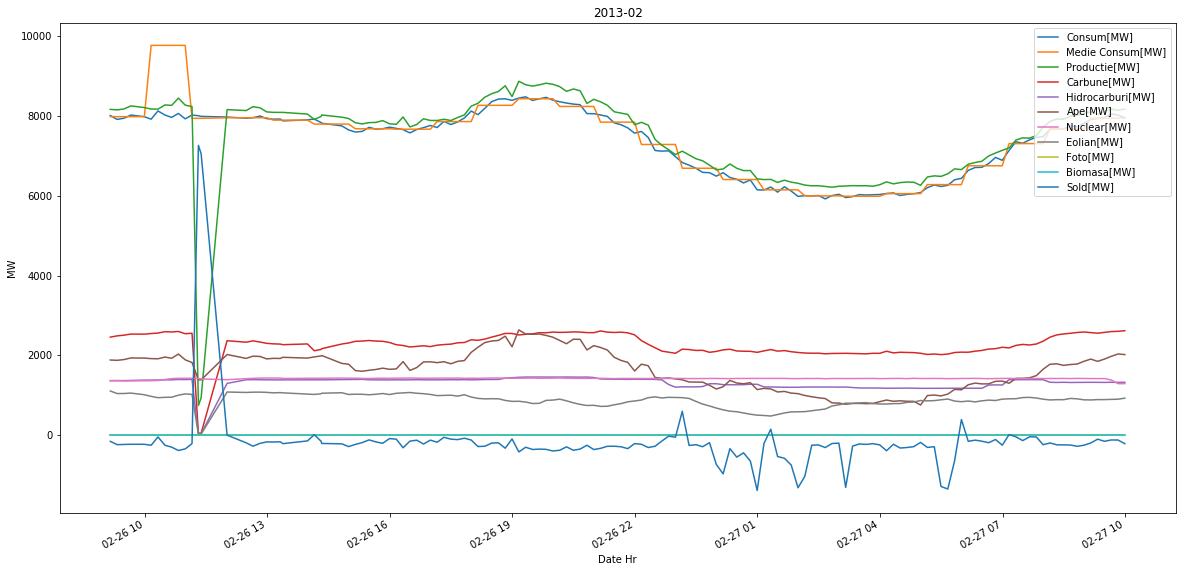

In [582]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
df.loc['2013-02-26 09':'2013-02-27 09'].plot(ax=ax1)
plt.xlabel('Date Hr')
plt.ylabel('MW')
plt.title('2013-02')
plt.legend(loc='upper right')
plt.savefig('2013-02')

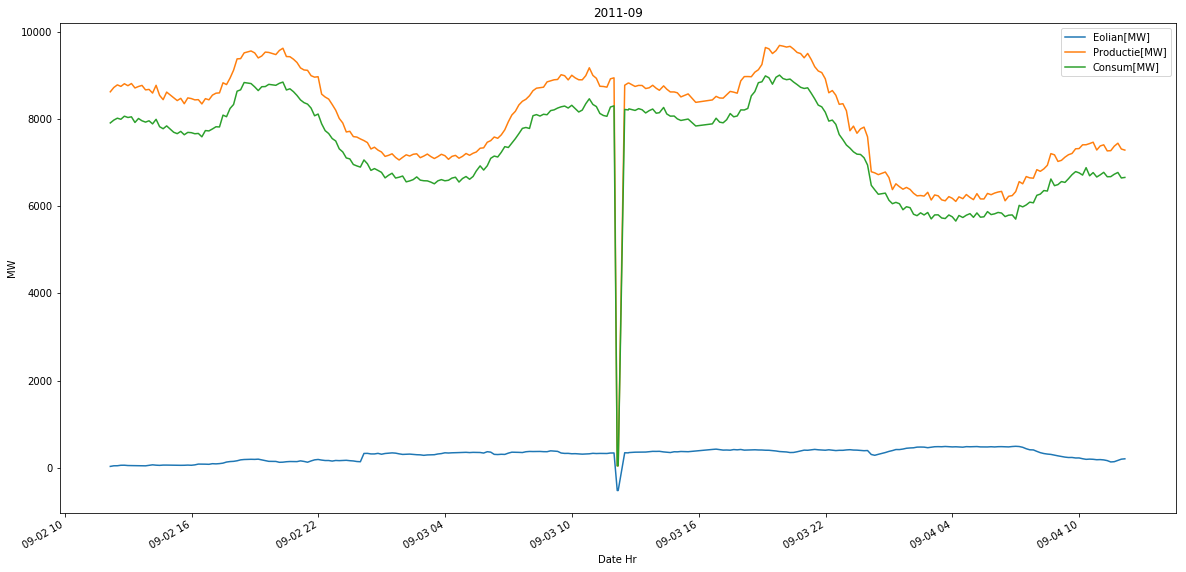

In [581]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
df.loc['2011-09-02 12:08:18':'2011-09-04 12:11:01',['Eolian[MW]','Productie[MW]','Consum[MW]']].plot(ax=ax1)
plt.xlabel('Date Hr')
plt.ylabel('MW')
plt.title('2011-09')
plt.savefig('2011-09')


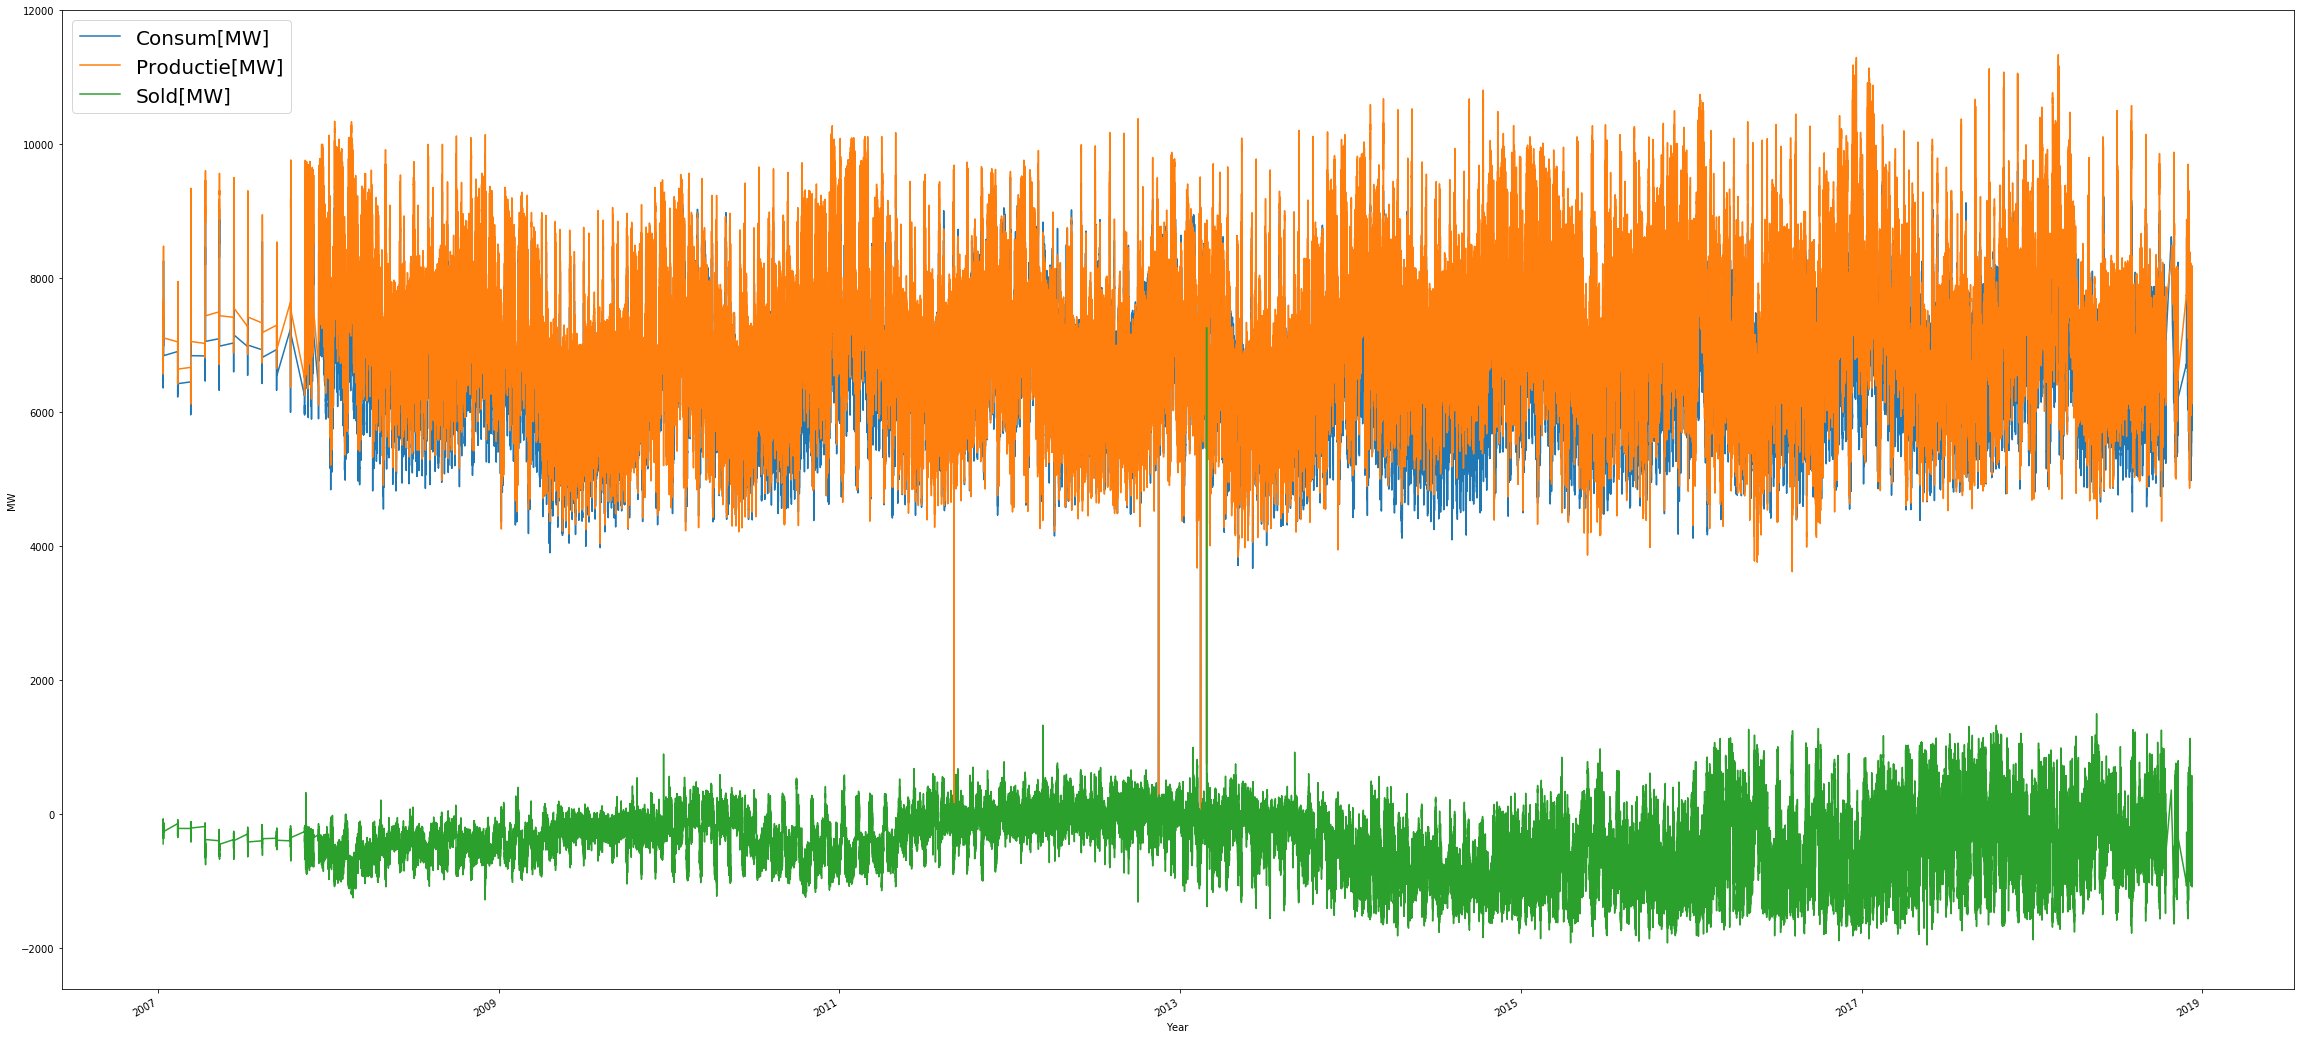

In [693]:
fig1, ax1 = plt.subplots(figsize=(40, 20))
df.loc[:,['Consum[MW]','Productie[MW]','Sold[MW]']].plot(ax=ax1)
plt.legend(loc='upper left', prop={'size': 20})
plt.xlabel('Year')
plt.ylabel('MW')
plt.savefig('Consumption vs Production 2007-2018')

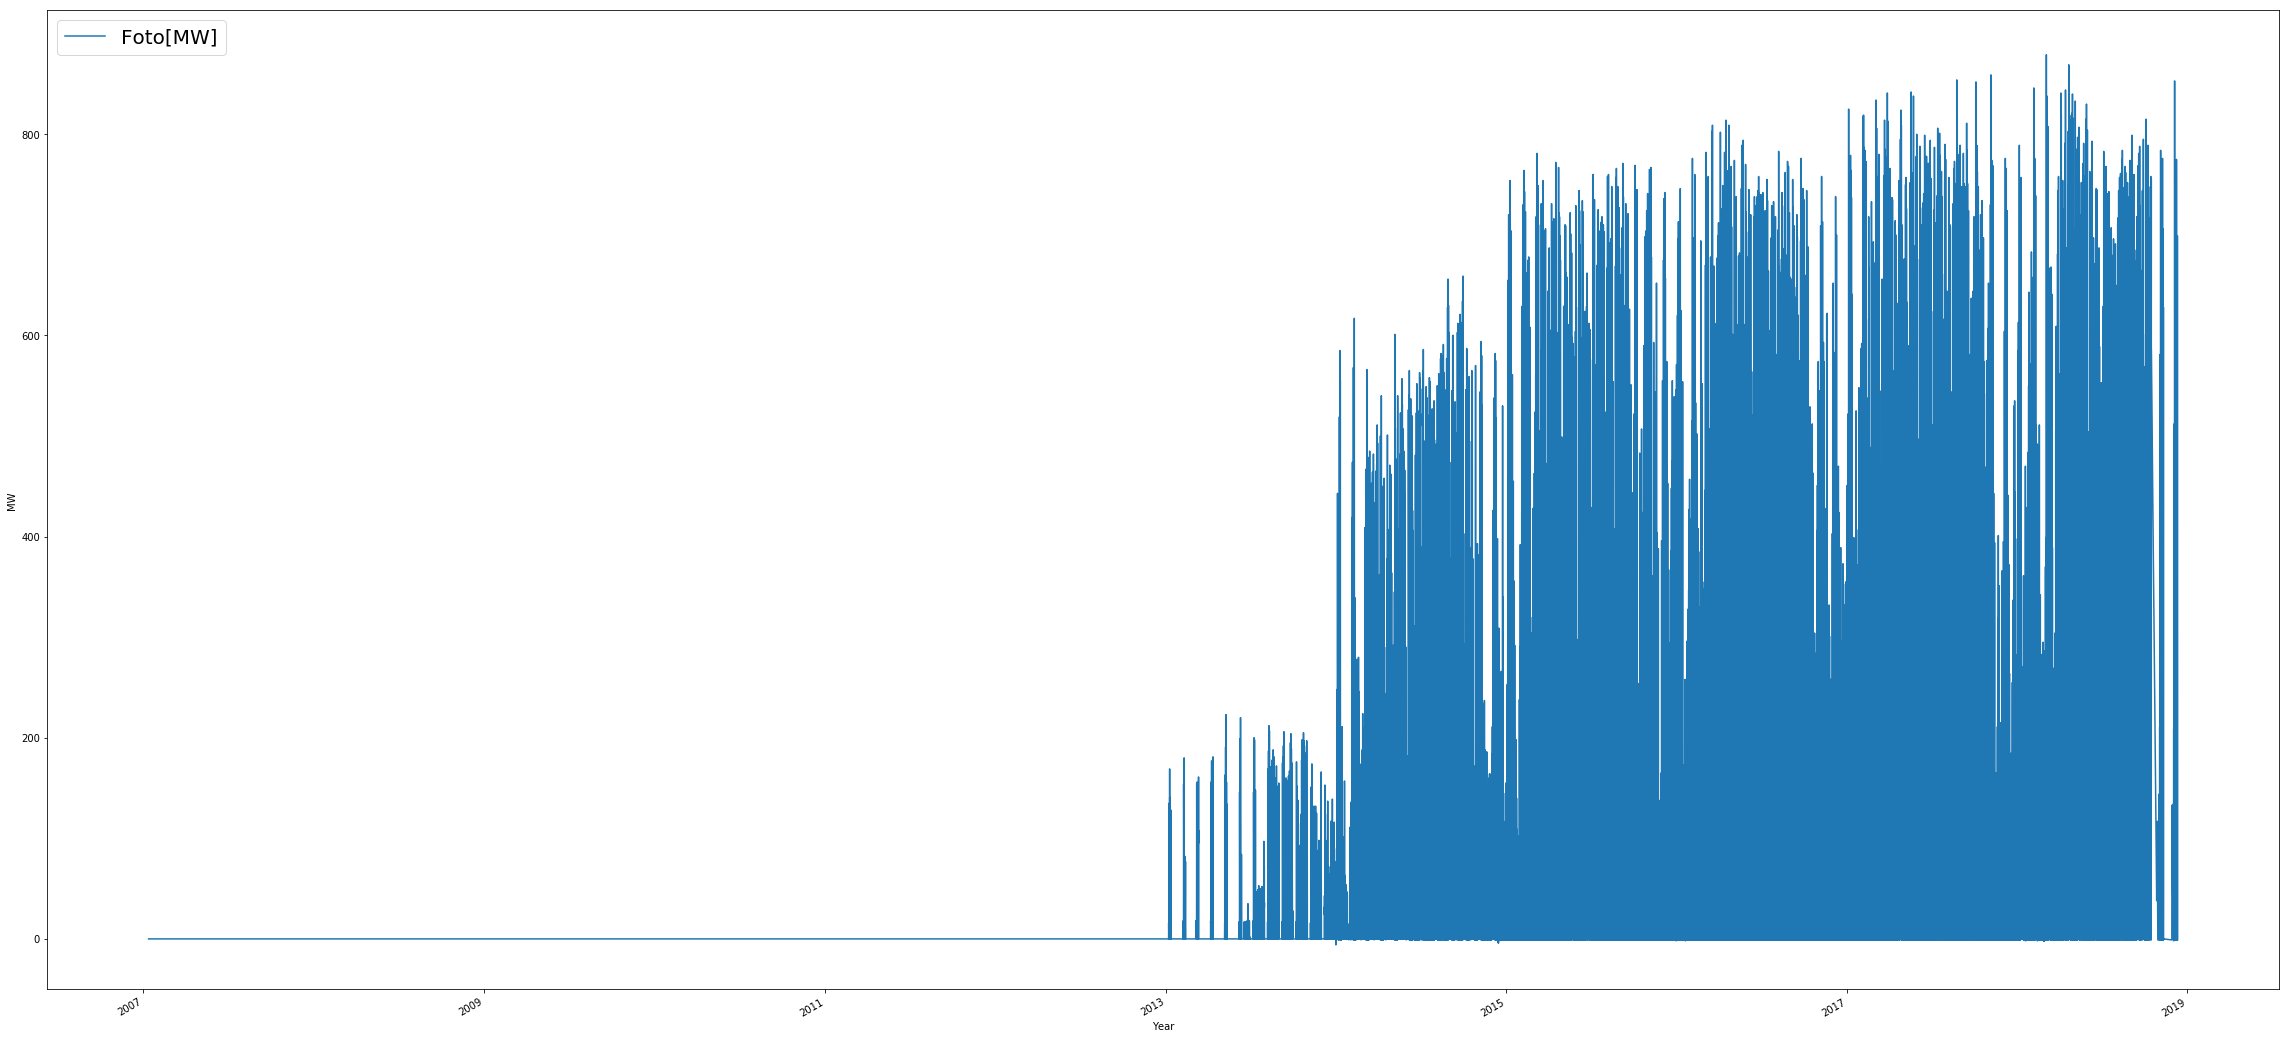

In [695]:
fig1, ax1 = plt.subplots(figsize=(40, 20))
dforig.loc[:,'Foto[MW]'].plot(ax=ax1)
plt.legend(loc='upper left', prop={'size': 20})
plt.xlabel('Year')
plt.ylabel('MW')
plt.savefig('Solar Generation 2007-2018')

In [657]:
fnz = dforig['Foto[MW]'].ne(0).idxmax() # first non-zero Foto Value/
print(fnz)

loc = df.index.get_loc(fnz) #This might be the date that photovoltaics were integrated into the grid

2013-01-07 07:39:51


In [658]:
df['Foto[MW]'].iloc[:loc-1]=np.nan #Assign everything prior to fnz as NaN

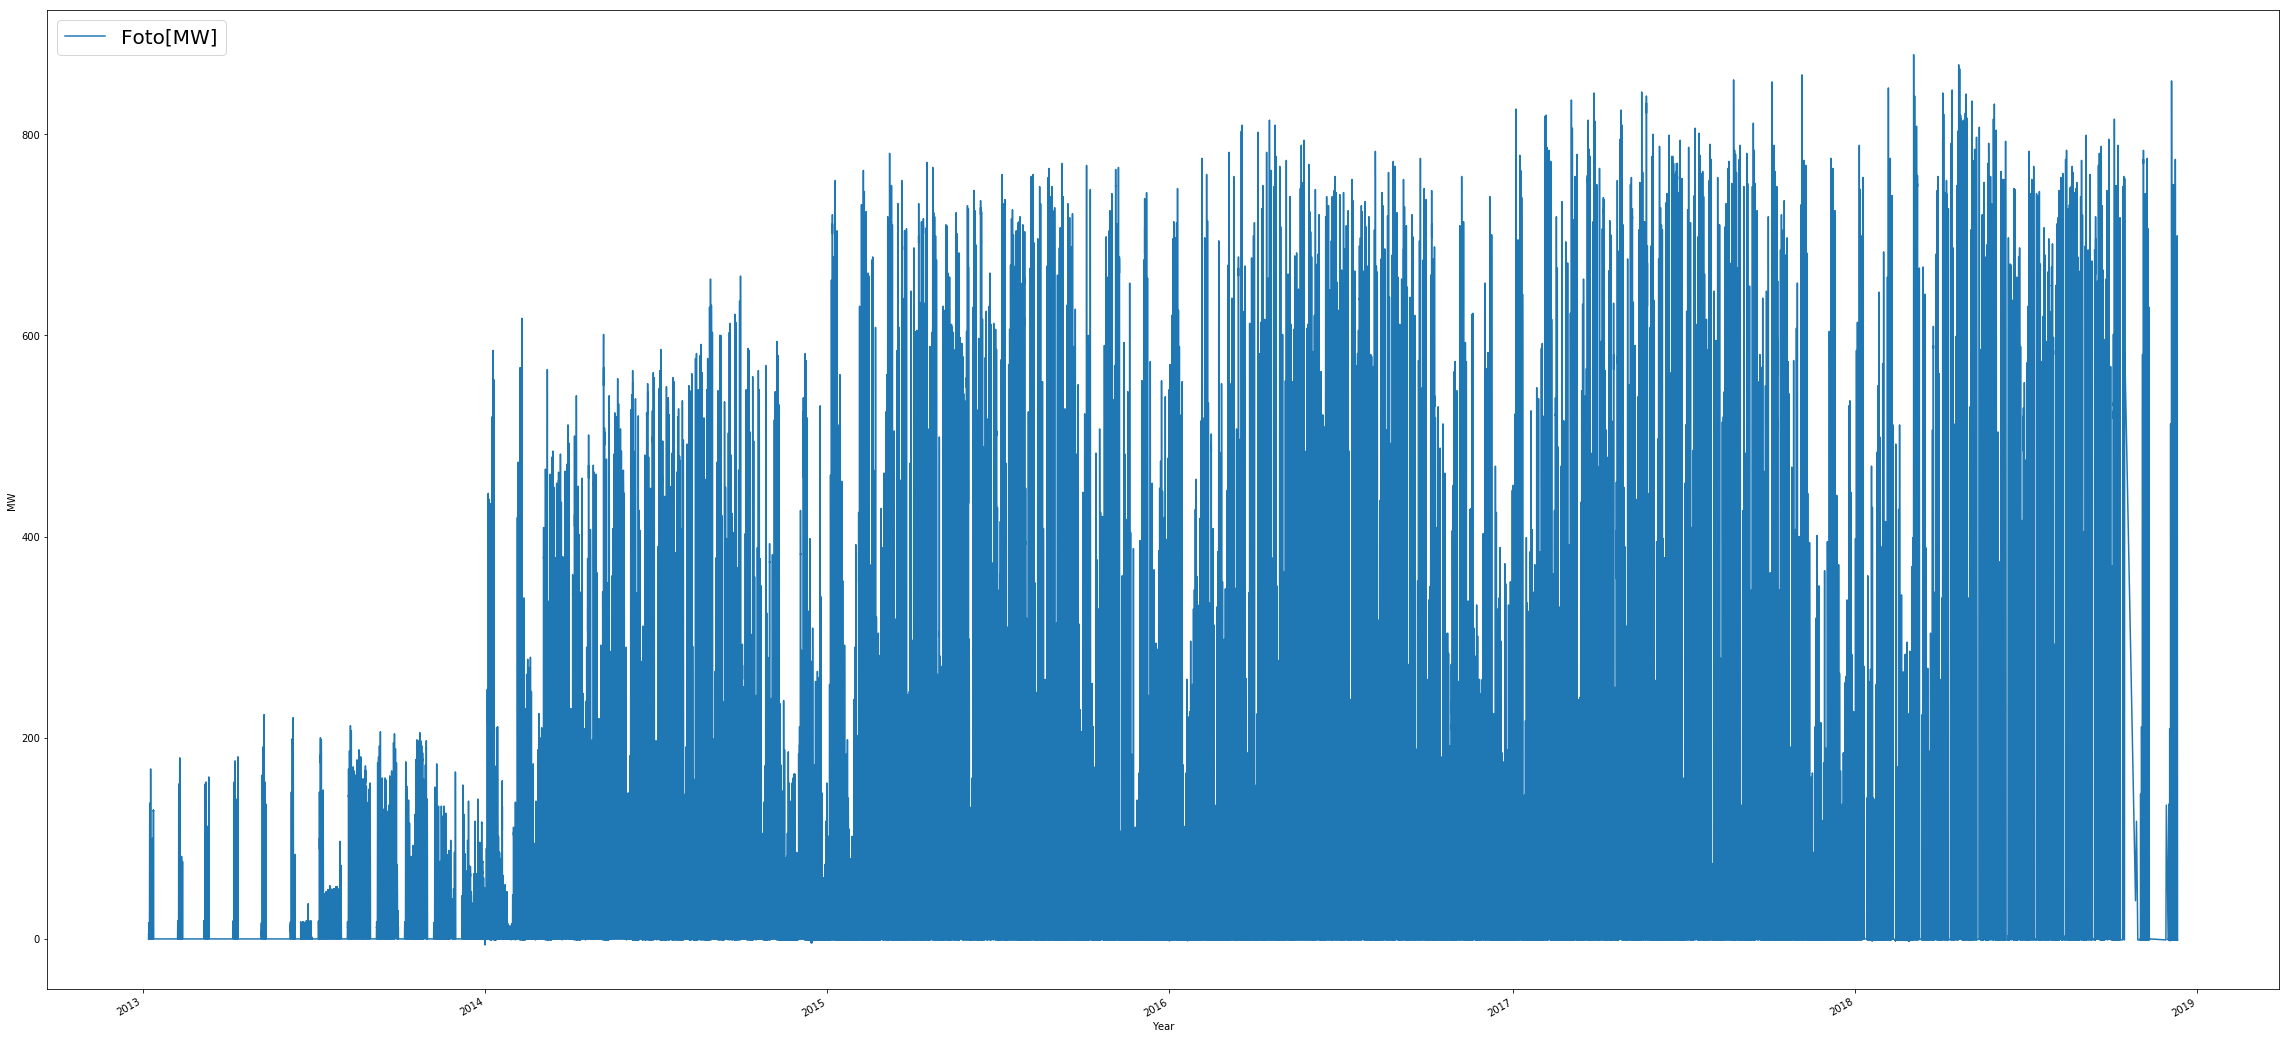

In [696]:
fig1, ax1 = plt.subplots(figsize=(40, 20))
df.loc[:,'Foto[MW]'].plot(ax=ax1)
plt.legend(loc='upper left', prop={'size': 20})
plt.xlabel('Year')
plt.ylabel('MW')
plt.savefig('Solar Generation 2013-2018')

In [708]:
dforig['Eolian[MW]'].nsmallest(5) #Sanity check: Can't have negative wind production

Data
2011-09-03 12:08:18   -521.0
2011-09-03 12:11:01   -521.0
2015-12-13 07:00:26    -26.0
2016-02-21 05:32:19    -26.0
2017-06-16 10:49:25    -26.0
Name: Eolian[MW], dtype: float64

In [682]:
df['Eolian[MW]']=df['Eolian[MW]'].mask(df['Eolian[MW]'].lt(0),0) #Replace negative values with 0

In [683]:
df['Eolian[MW]'].nsmallest(5) 

Data
2007-01-12 00:08:00    0.0
2007-01-12 00:18:00    0.0
2007-01-12 00:29:00    0.0
2007-01-12 00:39:00    0.0
2007-01-12 00:49:00    0.0
Name: Eolian[MW], dtype: float64

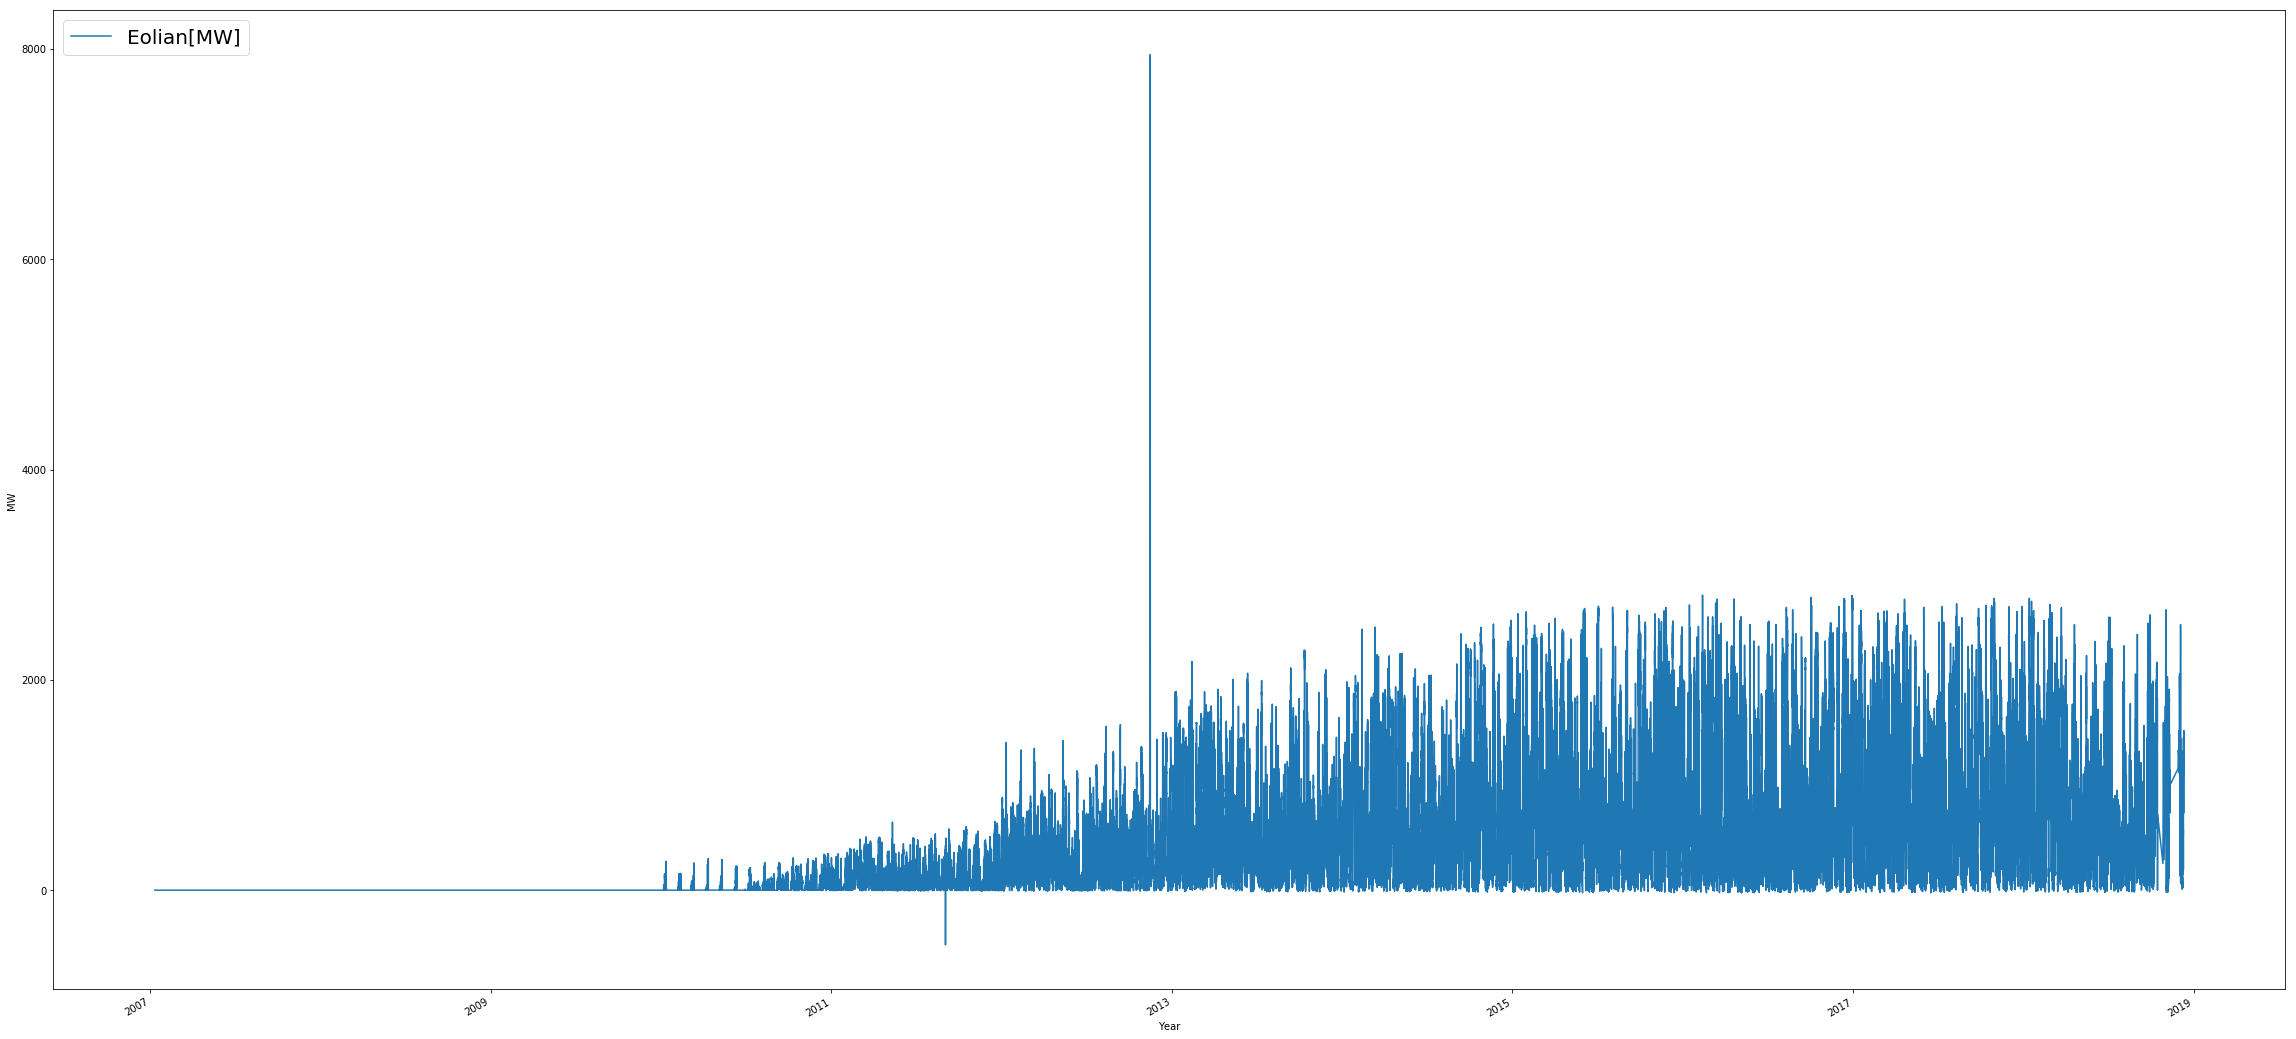

In [700]:
fig1, ax1 = plt.subplots(figsize=(40, 20))
dforig.loc[:,'Eolian[MW]'].plot(ax=ax1)
plt.legend(loc='upper left', prop={'size': 20})
plt.xlabel('Year')
plt.ylabel('MW')
plt.savefig('Original Wind Production') #Includes Negatives, 0 values, and Spike Event

In [709]:
fnz = dforig['Eolian[MW]'].ne(0).idxmax() # first non-zero Wind Value
print(fnz)

loc = df.index.get_loc(fnz) #This might be the date that Wind Turbines were integrated into the grid

2010-01-07 00:01:00


In [710]:
df['Eolian[MW]'].iloc[:loc-1]=np.nan #Assign everything prior to fnz as NaN

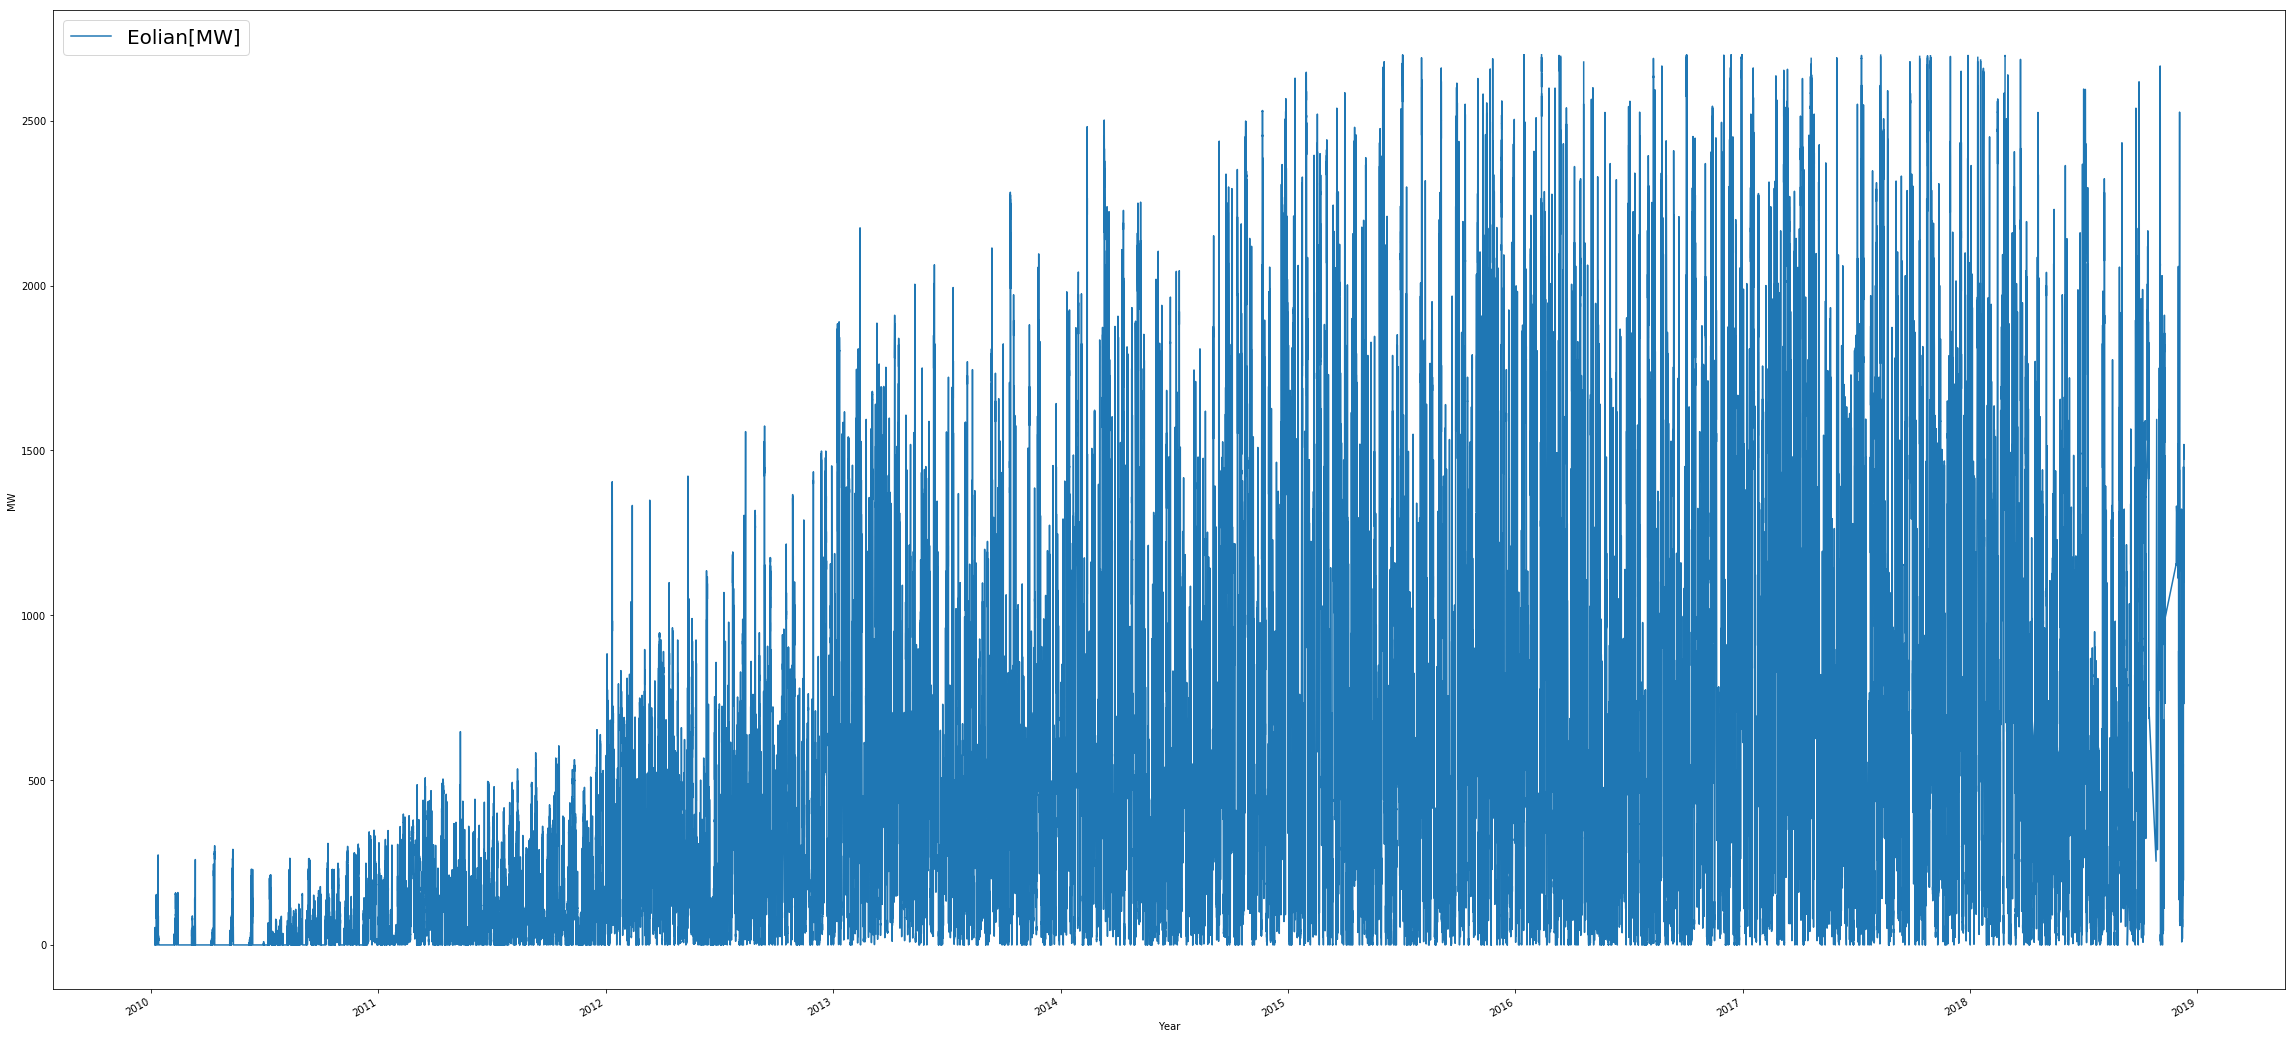

In [711]:
fig1, ax1 = plt.subplots(figsize=(40, 20))
df.loc[:,'Eolian[MW]'].plot(ax=ax1)
plt.legend(loc='upper left', prop={'size': 20})
plt.xlabel('Year')
plt.ylabel('MW')
plt.savefig('Updated Wind Production')

Text(0,0.5,'MW')

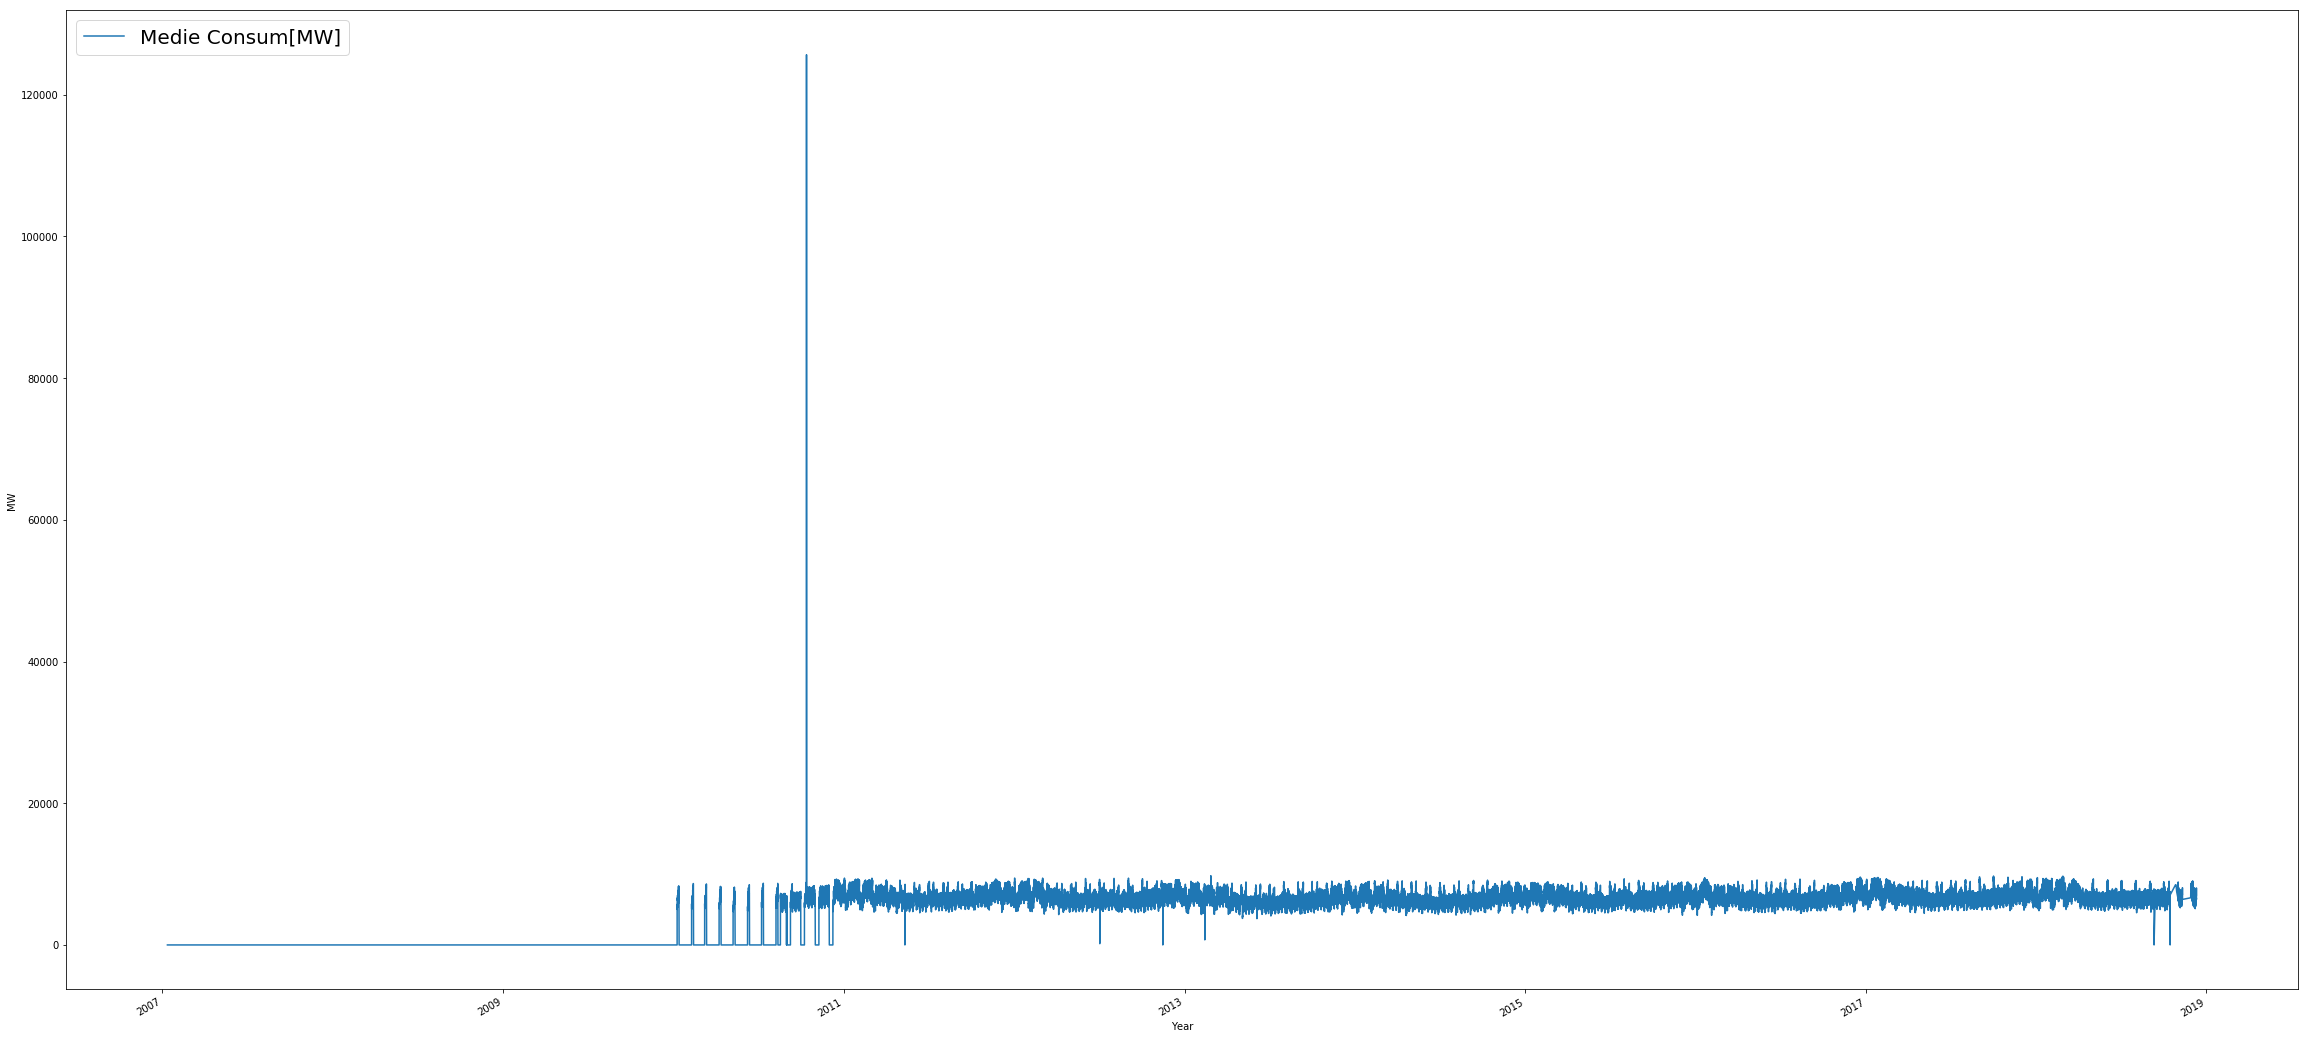

In [769]:
fig1, ax1 = plt.subplots(figsize=(40, 20))
dforig.loc[:,'Medie Consum[MW]'].plot(ax=ax1)
plt.legend(loc='upper left', prop={'size': 20})
plt.xlabel('Year')
plt.ylabel('MW')
#plt.savefig('Original Wind Production') #Includes Negatives, 0 values, and Spike Event

In [834]:
fnz = dforig['Medie Consum[MW]'].ne(0).idxmax() # first non-zero Wind Value
print(fnz)

loc = df.index.get_loc(fnz) #This might be the date that Wind Turbines were integrated into the grid

2010-01-09 00:09:31


In [835]:
df['Medie Consum[MW]'].iloc[:loc-1]=np.nan #Assign everything prior to fnz as NaN

In [836]:
df['Medie Consum[MW]'].iloc[loc:].isnull().any() #No Value after fnz is NaN

False

In [849]:
df['Medie Consum[MW]'].iloc[loc:].replace(0,np.nan,inplace=True)


In [871]:
print(df['Medie Consum[MW]'].iloc[loc:].idxmin())

2013-06-05 06:09:01


Text(0,0.5,'MW')

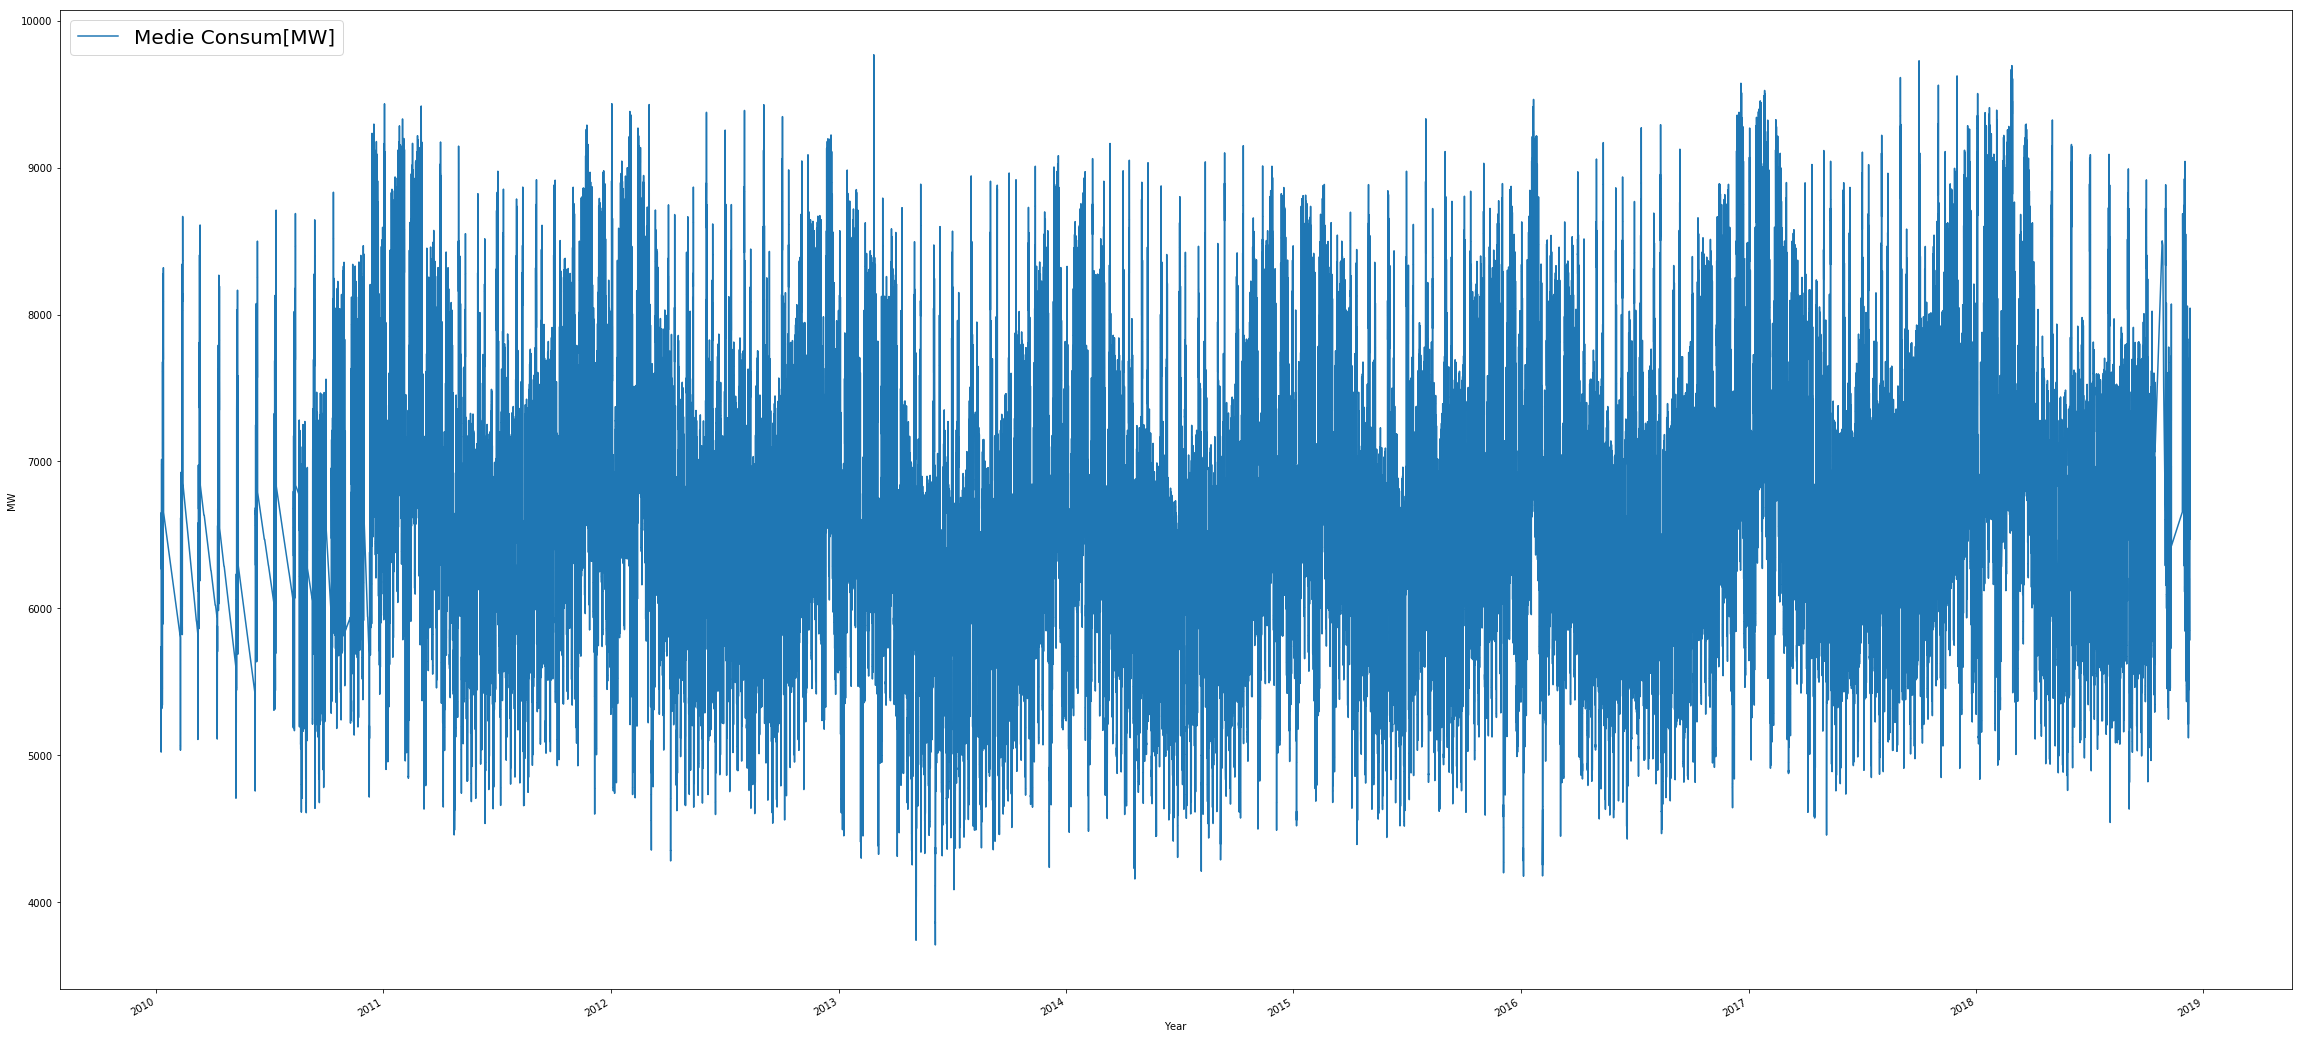

In [872]:
fig1, ax1 = plt.subplots(figsize=(40, 20))
df.loc[:,'Medie Consum[MW]'].plot(ax=ax1)
plt.legend(loc='upper left', prop={'size': 20})
plt.xlabel('Year')
plt.ylabel('MW')
#plt.savefig('Original Wind Production') #Includes Negatives, 0 values, and Spike Event

True

In [879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 568487 entries, 2007-01-12 00:08:00 to 2018-12-10 23:51:42
Data columns (total 11 columns):
Consum[MW]          568487 non-null float64
Medie Consum[MW]    460335 non-null float64
Productie[MW]       568487 non-null float64
Carbune[MW]         568487 non-null float64
Hidrocarburi[MW]    568487 non-null float64
Ape[MW]             568487 non-null float64
Nuclear[MW]         568487 non-null float64
Eolian[MW]          460101 non-null float64
Foto[MW]            306752 non-null float64
Biomasa[MW]         568487 non-null float64
Sold[MW]            568487 non-null float64
dtypes: float64(11)
memory usage: 72.0 MB


In [878]:
df.describe()

,Consum[MW],Medie Consum[MW],Productie[MW],Carbune[MW],Hidrocarburi[MW],Ape[MW],Nuclear[MW],Eolian[MW],Foto[MW],Biomasa[MW],Sold[MW]
count,568487.000000,460335.000000,568487.00000,568487.000000,568487.000000,568487.000000,568487.000000,460101.000000,306752.000000,568487.000000,568487.000000
mean,6624.599134,6617.756925,7040.72779,2340.455671,1003.410720,1869.873330,1316.884838,516.835124,120.247783,24.424537,-416.134248
std,1007.330006,981.159918,1157.76768,657.635581,469.563448,731.323626,229.779603,586.897625,200.632049,26.557792,473.546206
min,44.000000,3708.000000,0.00000,-485.000000,-414.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-1957.000000
25%,5856.000000,5887.000000,6206.00000,1847.000000,579.000000,1315.000000,1376.000000,72.000000,-1.000000,0.000000,-726.000000
50%,6589.000000,6560.185127,6979.00000,2284.000000,980.000000,1852.000000,1402.000000,289.000000,0.000000,0.000000,-381.000000
75%,7301.000000,7249.000000,7821.00000,2805.000000,1353.000000,2407.000000,1419.000000,763.000000,171.000000,52.000000,-70.000000
max,9865.000000,9769.000000,11336.00000,5702.000000,2666.000000,4728.000000,1450.000000,2700.000000,879.000000,110.000000,7261.333333


In [877]:
CV = df.std()/df.mean()
print(CV.sort_values(ascending=False))

Foto[MW]            1.668489
Eolian[MW]          1.135561
Biomasa[MW]         1.087341
Hidrocarburi[MW]    0.467967
Ape[MW]             0.391109
Carbune[MW]         0.280986
Nuclear[MW]         0.174487
Productie[MW]       0.164439
Consum[MW]          0.152059
Medie Consum[MW]    0.148262
Sold[MW]           -1.137965
dtype: float64


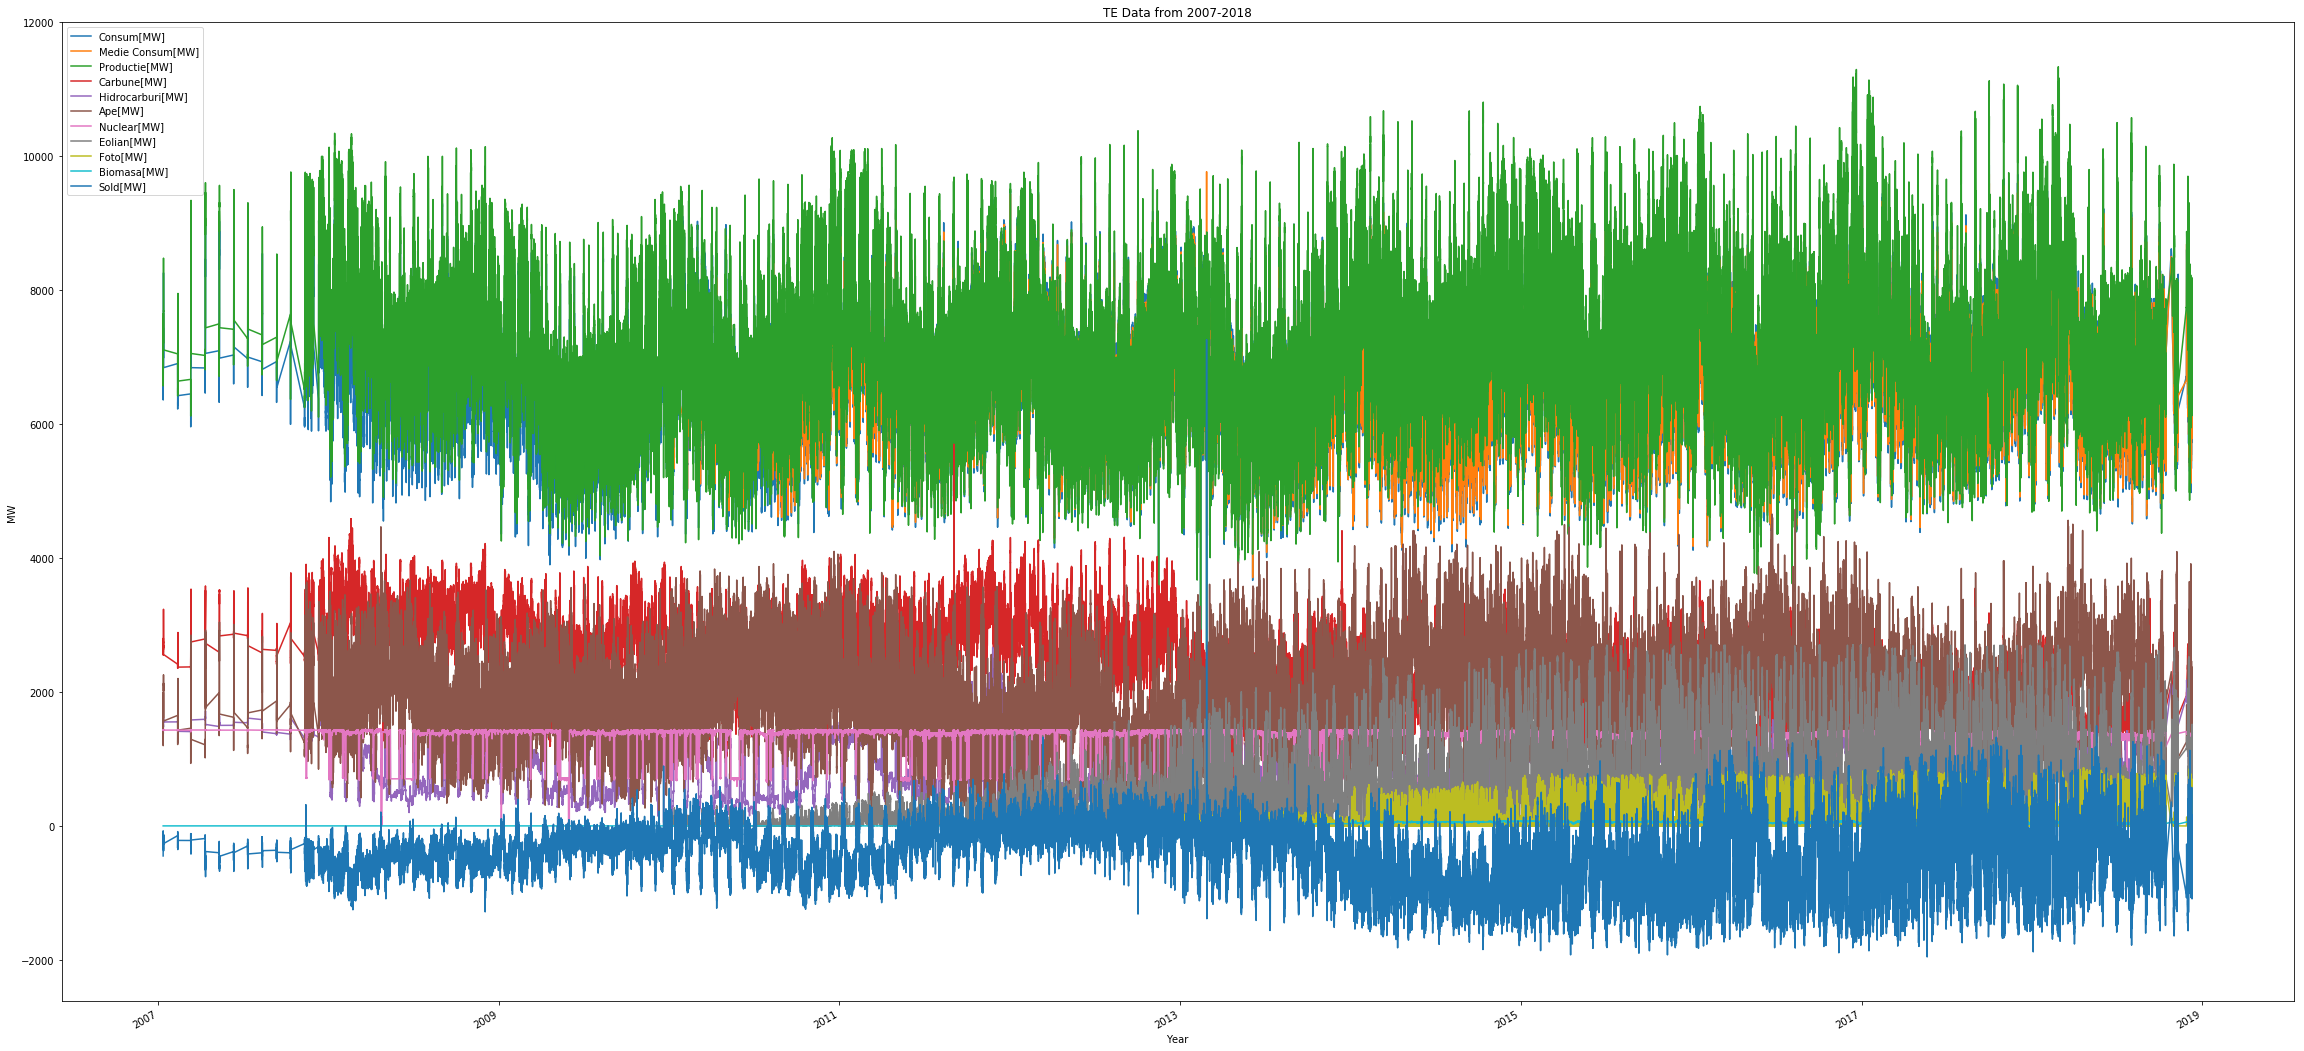

In [876]:
fig, ax = plt.subplots(figsize=(40, 20))
df.plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('MW')
plt.title('TE Data from 2007-2018')
plt.savefig('Energy Data from 2007-2018cleaned')

In [874]:
rsf = 'Q'
df2= df.resample(rsf).mean()
df2.head()

,Consum[MW],Medie Consum[MW],Productie[MW],Carbune[MW],Hidrocarburi[MW],Ape[MW],Nuclear[MW],Eolian[MW],Foto[MW],Biomasa[MW],Sold[MW]
Data,,,,,,,,,,,
2007-03-31,7206.242991,NaN,7438.955607,2762.399533,1480.792056,1766.460280,1429.296729,NaN,NaN,0.0,-232.735981
2007-06-30,7847.235012,NaN,8336.745803,3141.467626,1559.669065,2204.685851,1430.899281,NaN,NaN,0.0,-489.494005
2007-09-30,7357.453704,NaN,7765.083333,2834.682870,1489.180556,2009.300926,1431.893519,NaN,NaN,0.0,-407.608796
2007-12-31,7560.989839,NaN,8053.896281,3080.616181,1485.838574,2103.609279,1383.921396,NaN,NaN,0.0,-492.910084
2008-03-31,7138.969237,NaN,7809.721266,3270.428653,1221.520617,1968.941640,1348.804627,NaN,NaN,0.0,-670.743750


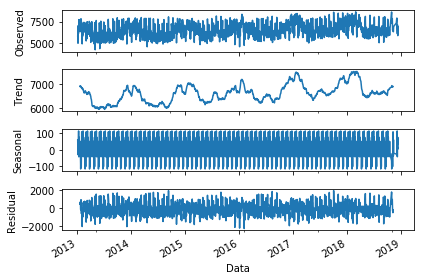

In [795]:
res = sm.tsa.seasonal_decompose(df2["Consum[MW]"], freq=30)
res.plot()
plt.savefig('Seasonal Decomposition Plot (Daily Frequency)')

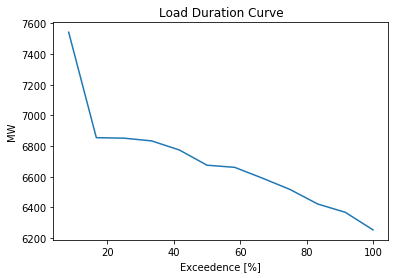

In [765]:
sort = np.sort(df2['Consum[MW]'])[::-1]
exceedence = np.arange(1.,len(sort)+1) / len(sort)

plt.plot(exceedence*100, sort)
plt.xlabel("Exceedence [%]")
plt.ylabel("MW")
plt.title('Load Duration Curve')
plt.show()

Text(0.5,1,'Frequency of Consumption[MW]: Y')

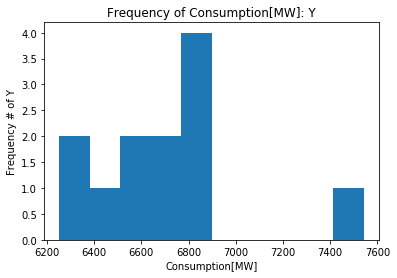

In [766]:
plt.hist(df2['Consum[MW]'])
plt.xlabel("Consumption[MW]")
plt.ylabel("Frequency # of " + str(rsf))
plt.title('Frequency of Consumption[MW]: '+str(rsf))

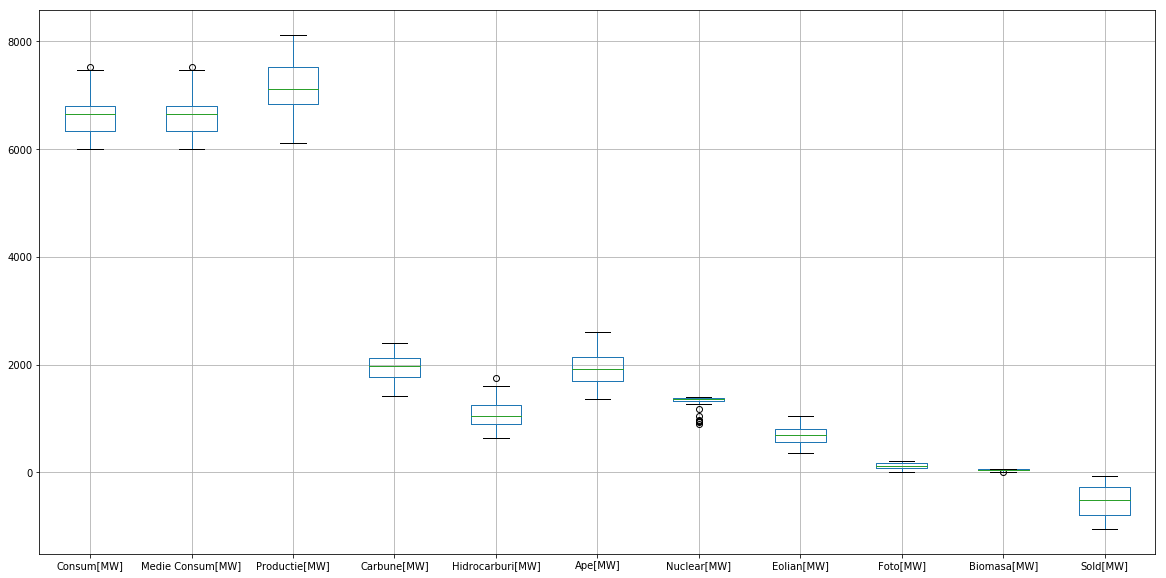

In [732]:
fig, ax = plt.subplots(figsize=(20, 10))
df2.boxplot(ax=ax)

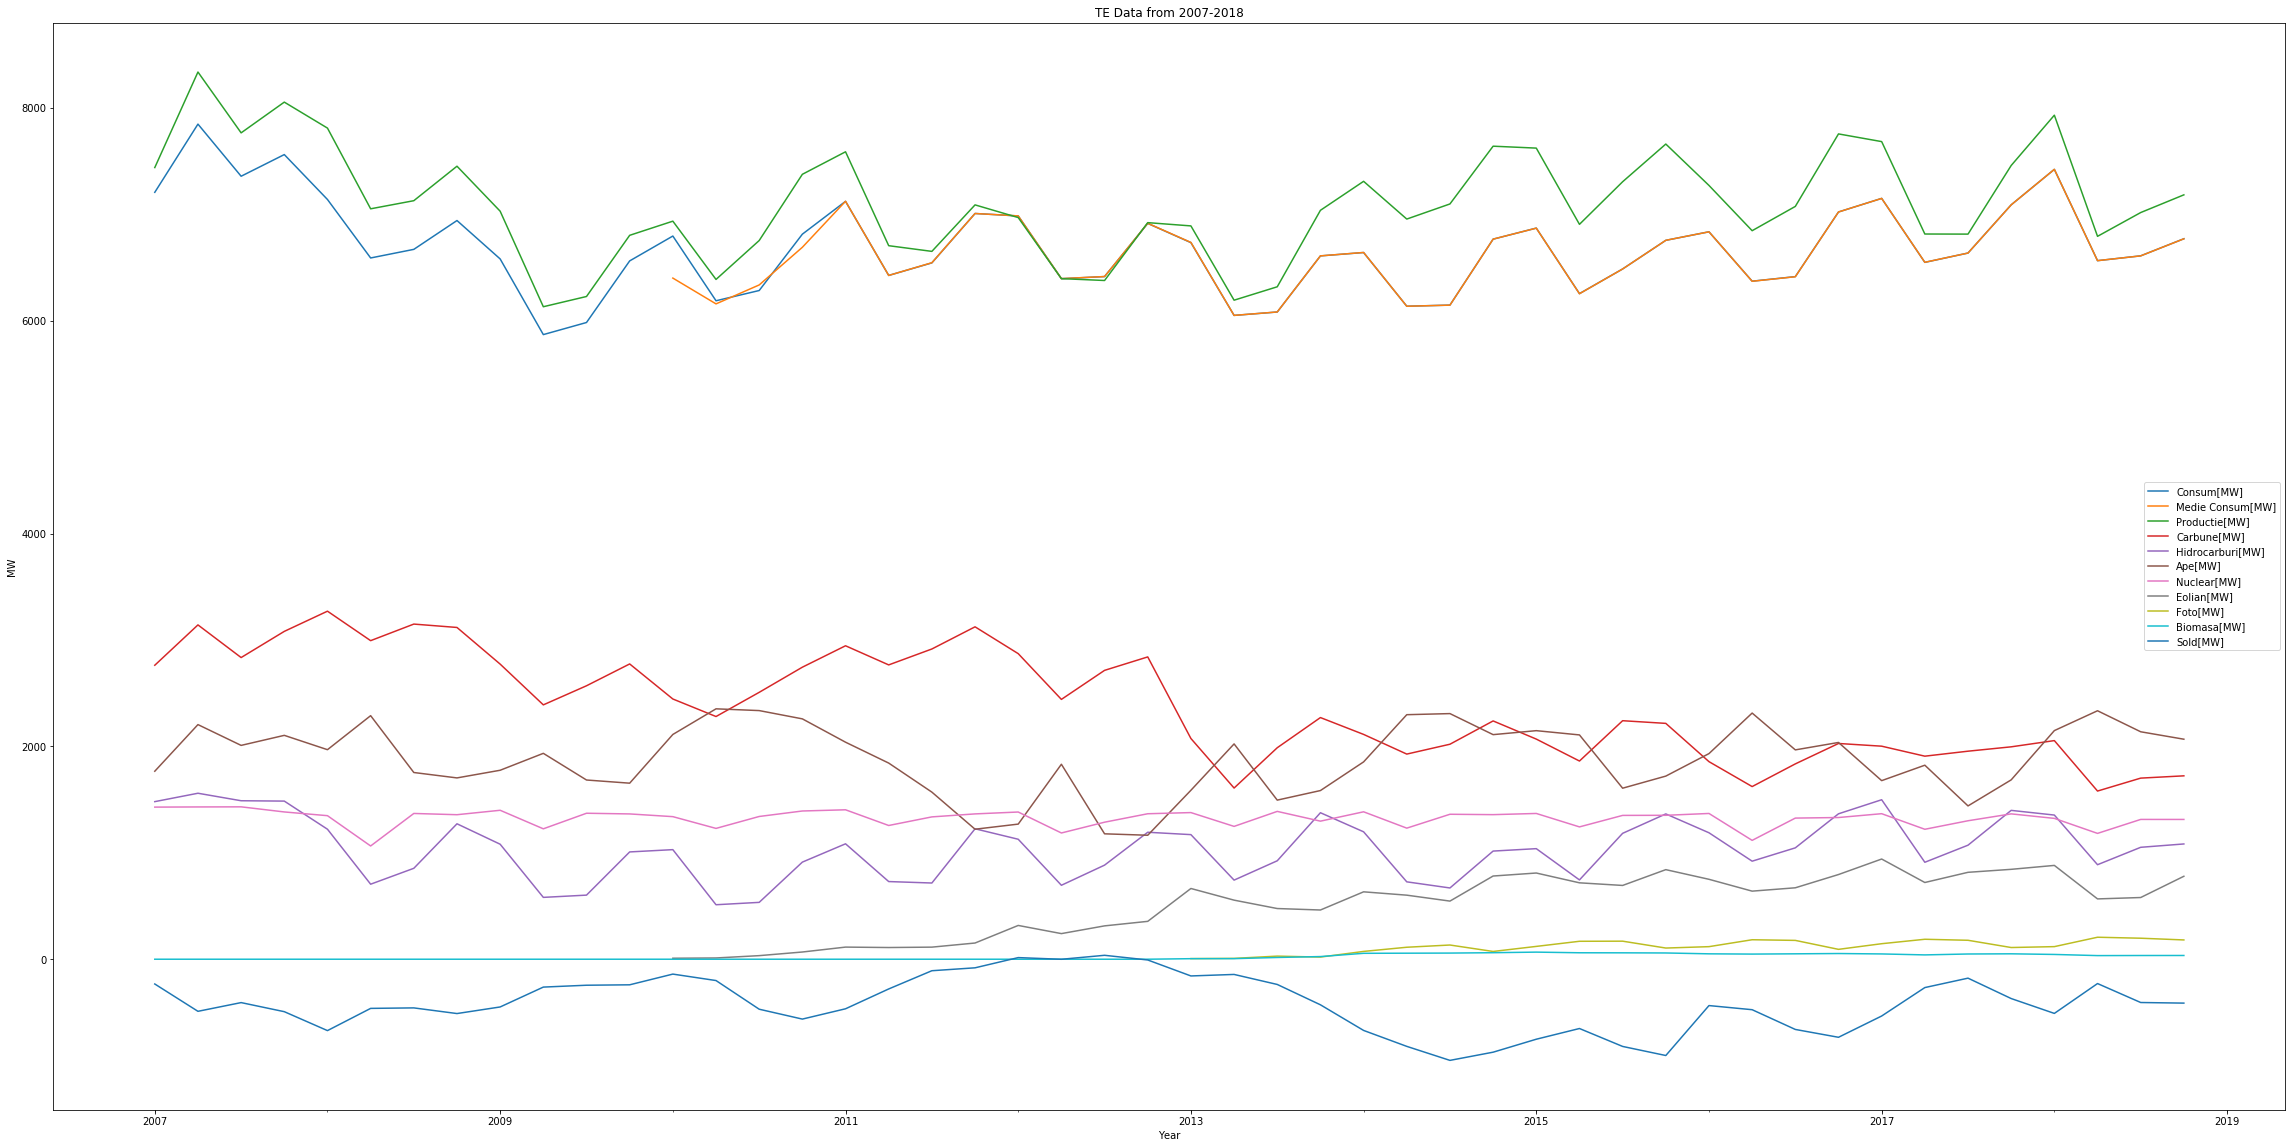

In [875]:
fig, ax = plt.subplots(figsize=(40, 20))
df2.plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('MW')
plt.title('TE Data from 2007-2018')
plt.savefig('Energy Data Resampled for Quarters')